<a href="https://colab.research.google.com/github/KanizAny25/COVID-19-affect-world-happiness/blob/main/World_Happiness_2020_VS_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How did the year of COVID-19 affect world happiness?

World Happiness: 2021 vs 2020 

In [117]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# from plotly.offline import init_notebook_mode
# init_notebook_mode(connected=True)
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import textwrap

# display(plt.style.available)
# display(pio.renderers)
# display(pio.templates)

In [ ]:
plt.style.use('default')
plt.style.use('seaborn-white')
plt.style.use('seaborn-notebook')
sns.set_palette('Set2')

pio.templates.default = "seaborn"

In [ ]:
# create wide df

train20 = pd.read_csv("gdrive/My Drive/Colab_notebook/2020.csv")
train21 = pd.read_csv("gdrive/My Drive/Colab_notebook/2021.csv")

lcols = [0,1,2,6,7,8,9,10,11]
train20 = train20.iloc[:, lcols]
train21 = train21.iloc[:, lcols]

train20['Year'] = 2020
train21['Year'] = 2021

train = pd.concat([train21, train20])
train.rename(columns={'Country name': 'Country', 
                   'Regional indicator': 'Region', 
                   'Ladder score': 'Happiness score'}, inplace=True)
train['all'] = ''
# display(train)

df20 = df[df.Year == 2020]
df21 = df[df.Year == 2021]
# display(train20)

# create long train

trainM = train.melt(id_vars=['Country', 
                       'Region', 
                       'Year'], 
              value_vars=train.columns[2:-2], 
              var_name='Var', value_name='Value')
trainM['all'] = ''
# display(trainM)

In [ ]:
# create wide %change train

trainall = trainM.pivot(index=['Country', 'Region'], columns=['Var', 'Year'], values='Value').reset_index()

scorecols = train.columns[2:-2]
for col in scorecols:
    trainall[(col, '% Ch')] = ((trainall[(col, 2021)] - trainall[(col, 2020)])/trainall[(col, 2020)])*100
# display(trainall.sort_index(axis=1))

traindiff = trainall[['Country', 'Region']].join(trainall.loc[:, pd.IndexSlice[:, '% Ch']])
# display(traindiff)

diff.columns = traindiff.columns.to_flat_index().str.join(' ').str.rstrip(' ')
traindiff.dropna(inplace=True)
# display(traindiff)

# create long %change train

traindiffM = traindiff.melt(id_vars = traindiff.columns[0:2], 
                      value_vars = traindiff.columns[2:], 
                      var_name='Var', value_name='Value'
                     )
# traindiffM['all'] = ''

# add feature
dfdiffM['% Change'] = traindiffM.apply(lambda row: 'Positive' if row.Value > 0
                                  else 'Negative', 
                                  axis=1)
# display(traindiffM)

# traindiffM.to_csv('traindiffM.csv')
# trainall.sort_index(axis=1).to_csv('trainall.csv')

In [ ]:
display(trainall.sort_index(axis=1))

Var       Country Freedom to make life choices  ... Social support          
Year                                      2020  ...           2021      % Ch
0     Afghanistan                     0.396573  ...          0.463 -1.566214
1         Albania                     0.781994  ...          0.697  3.863908
2         Algeria                     0.466611  ...          0.802 -0.172413
3       Argentina                     0.831132  ...          0.898 -0.285148
4         Armenia                     0.712018  ...          0.799  5.481412
..            ...                          ...  ...            ...       ...
149     Venezuela                     0.623278  ...          0.861 -3.302773
150       Vietnam                     0.939593  ...          0.850  0.001512
151         Yemen                     0.599920  ...          0.832  1.713905
152        Zambia                     0.806500  ...          0.708  1.312996
153      Zimbabwe                     0.711458  ...          0.750 -1.715749

[154 rows x 23 columns]

In [ ]:
def hist(var):
    fig = px.histogram(train, x=var, 
                 marginal='box', 
                 color_discrete_sequence=px.colors.qualitative.Set3,
                )
    fig.update_layout(width=480, height=360)
    fig.show()

hist(scorecols[0])

In [ ]:
hist(scorecols[1])

In [ ]:
hist(scorecols[2])

In [ ]:
hist(scorecols[3])

In [ ]:
hist(scorecols[4])

In [ ]:
hist(scorecols[5])

In [ ]:
hist(scorecols[6])

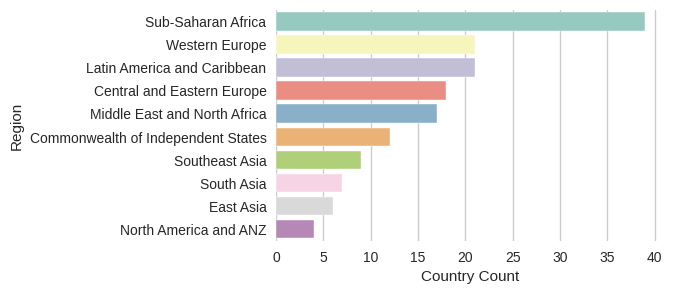

In [ ]:
data = train.groupby('Region').Country.nunique().sort_values(ascending=False)
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(5,3))
    sns.barplot(y=data.index, x=data, palette='Set3')
    plt.gca().set_xlabel('Country Count')
    sns.despine(left=True, bottom=True)

In [ ]:
display(data.to_frame())

Country
Region                                     
Sub-Saharan Africa                       39
Western Europe                           21
Latin America and Caribbean              21
Central and Eastern Europe               18
Middle East and North Africa             17
Commonwealth of Independent States       12
Southeast Asia                            9
South Asia                                7
East Asia                                 6
North America and ANZ                     4

In [ ]:
s = train.groupby('Region').Country.unique()
for i in range(len(s)-1):
    print(s.index[i]+':')
    print(s[i])
    print()

Central and Eastern Europe:
['Czech Republic' 'Slovenia' 'Kosovo' 'Slovakia' 'Lithuania' 'Estonia'
 'Poland' 'Romania' 'Serbia' 'Latvia' 'Hungary' 'Croatia'
 'Bosnia and Herzegovina' 'Montenegro' 'Bulgaria' 'Albania'
 'North Macedonia' 'Macedonia']

Commonwealth of Independent States:
['Uzbekistan' 'Kazakhstan' 'Moldova' 'Kyrgyzstan' 'Belarus' 'Russia'
 'Tajikistan' 'Armenia' 'Azerbaijan' 'Turkmenistan' 'Georgia' 'Ukraine']

East Asia:
['Taiwan Province of China' 'Japan' 'South Korea' 'Mongolia'
 'Hong Kong S.A.R. of China' 'China']

Latin America and Caribbean:
['Costa Rica' 'Guatemala' 'Uruguay' 'Brazil' 'Mexico' 'Jamaica' 'Panama'
 'Chile' 'El Salvador' 'Colombia' 'Nicaragua' 'Argentina' 'Honduras'
 'Peru' 'Ecuador' 'Bolivia' 'Paraguay' 'Dominican Republic' 'Venezuela'
 'Haiti' 'Trinidad and Tobago']

Middle East and North Africa:
['Israel' 'Bahrain' 'United Arab Emirates' 'Saudi Arabia' 'Kuwait' 'Libya'
 'Turkey' 'Morocco' 'Algeria' 'Iraq' 'Iran' 'Tunisia' 'Lebanon'
 'Palestinian T

In [ ]:
data = trainM[trainM.Year == 2021]
fig = px.choropleth(data, locations='Country', locationmode='country names',color='Value',animation_frame = 'Var',
                    color_continuous_scale='Purpor_r',
                    title=('Values from 2021 Report'))
fig.update_layout(height=600)
fig.show()

In [ ]:
data = traindiffM
fig = px.choropleth(data, locations='Country', locationmode='country names', 
                    color='Value',
                    animation_frame = 'Var',
                    color_continuous_scale='Tropic',
                    color_continuous_midpoint=0, title=('Percent Change (2020 to 2021)')
                   )
fig.update_layout(height=600)
fig.show()

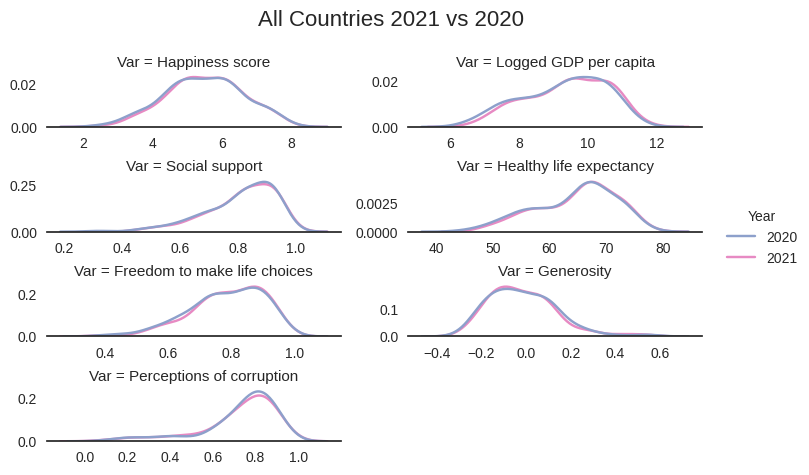

In [ ]:
g = sns.displot(data=trainM, x='Value', col='Var', hue='Year', kind='kde', 
                col_wrap=2, 
                palette=sns.color_palette()[2:4],
                height=1.25, aspect=3, 
                facet_kws={'sharey': False, 'sharex': False}
               )
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('All Countries 2021 vs 2020', size=16)
g.set_axis_labels('','')
sns.despine(left=True)

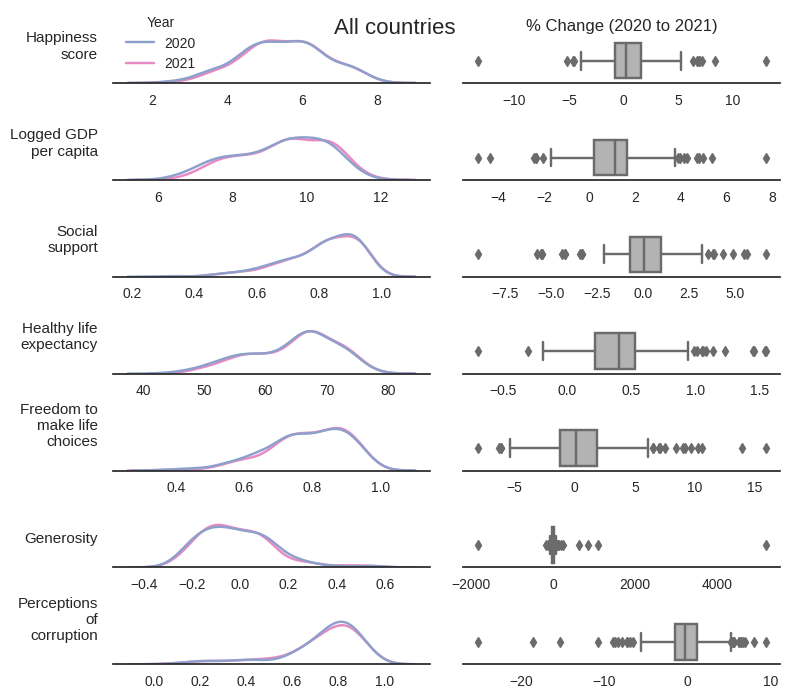

In [107]:
def varcompare(train1=train, train2=traindiff, region=None):
    diffcols = traindiff.columns[2:]
    fig, axes = plt.subplots(7, 2, figsize=(8,7))
    
    if region:
        df1 = train[train.Region == region]
        df2 = traindiff[traindiff.Region == region]
        fig.suptitle(region, size=16)
    else:
        fig.suptitle('All countries', size=16)

    for i, var in enumerate(scorecols):
        sns.kdeplot(data=train1, x=var, hue='Year', ax=axes[i][0], palette=sns.color_palette()[2:4])
        axes[i][0].set_ylabel(textwrap.fill(var, 12), rotation=0, horizontalalignment='right')
        axes[i][0].set_xlabel('')
        axes[i][0].set_yticklabels([])

    for i, var in enumerate(diffcols):
        sns.boxplot(data=train2, x=var, ax=axes[i][1], palette=[sns.color_palette()[-1]])
        axes[i][1].set_xlabel('')

    for i in range(1, 7):
        axes[i][0].legend_.remove()

#     axes[0][0].set_title('2021 vs 2020')
    axes[0][1].set_title('% Change (2020 to 2021)')

    plt.tight_layout()
    sns.despine(left=True)
#     fig.subplots_adjust(top=0.90)
    plt.show()

varcompare()

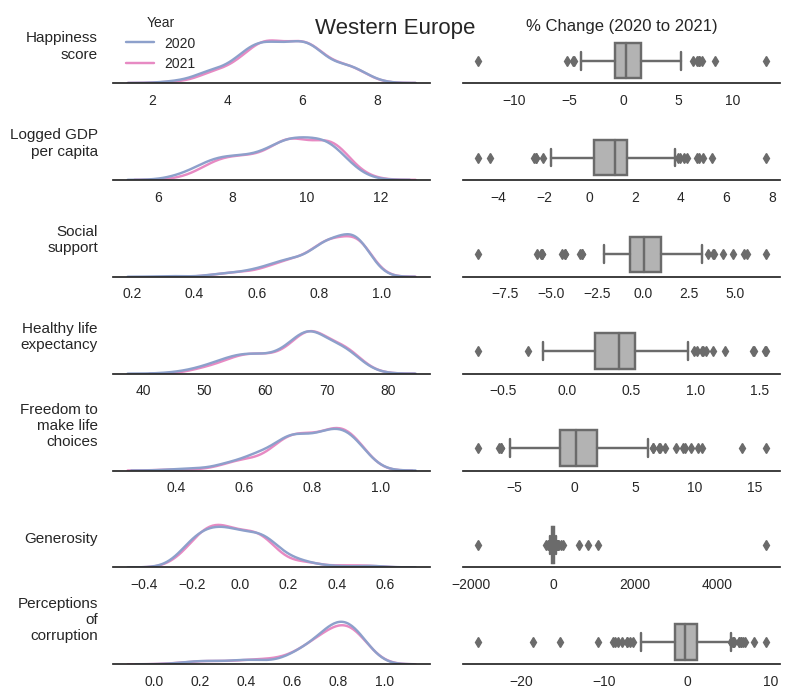

In [108]:
region = train.Region.unique()[0]
varcompare(region=region)

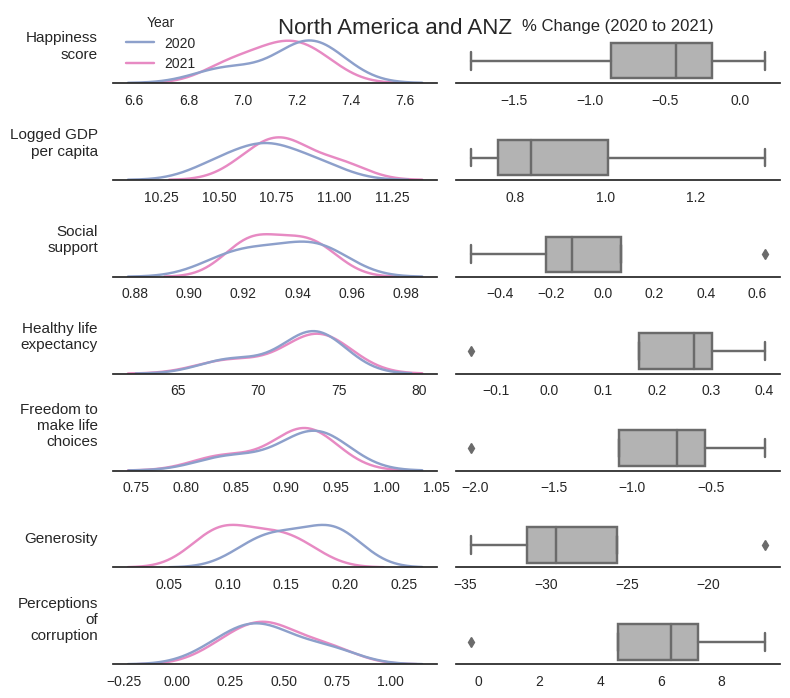

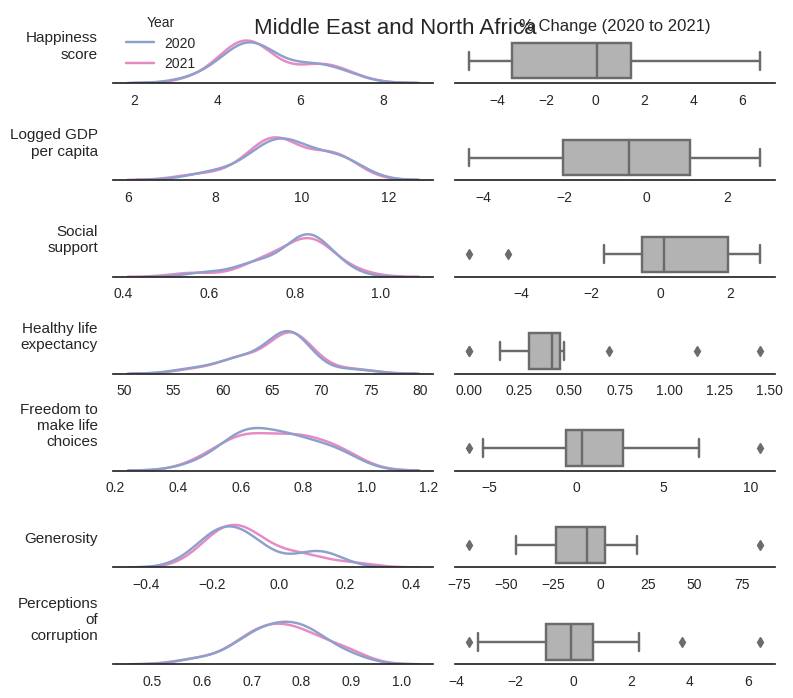

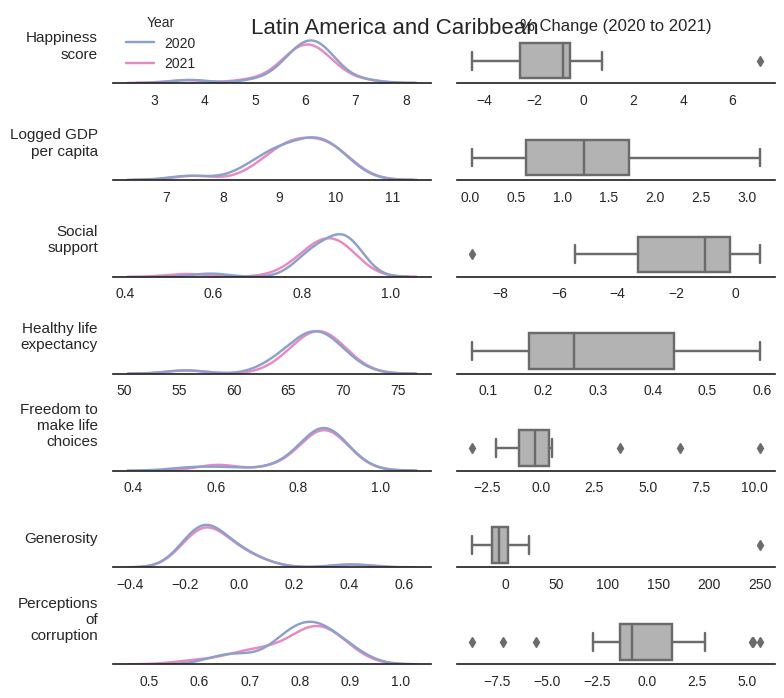

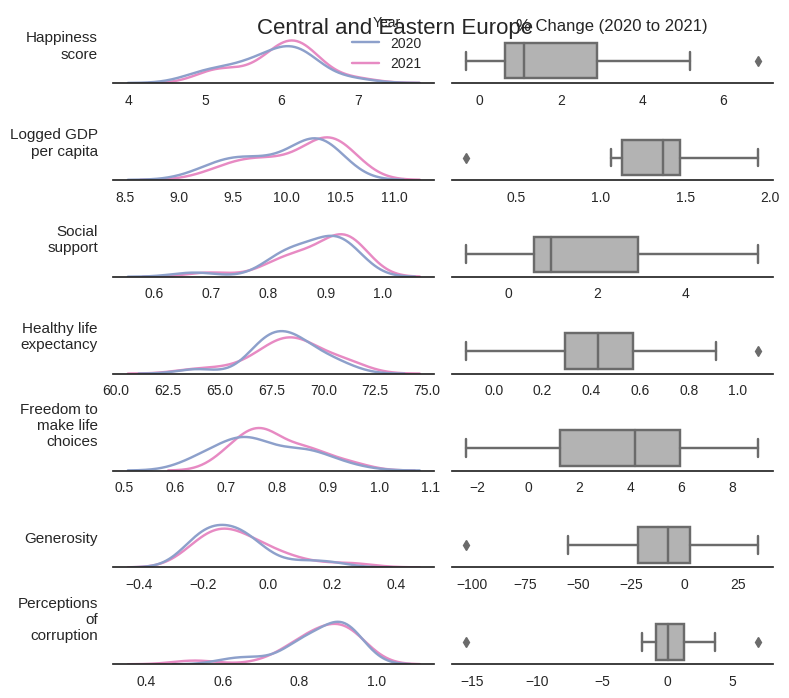

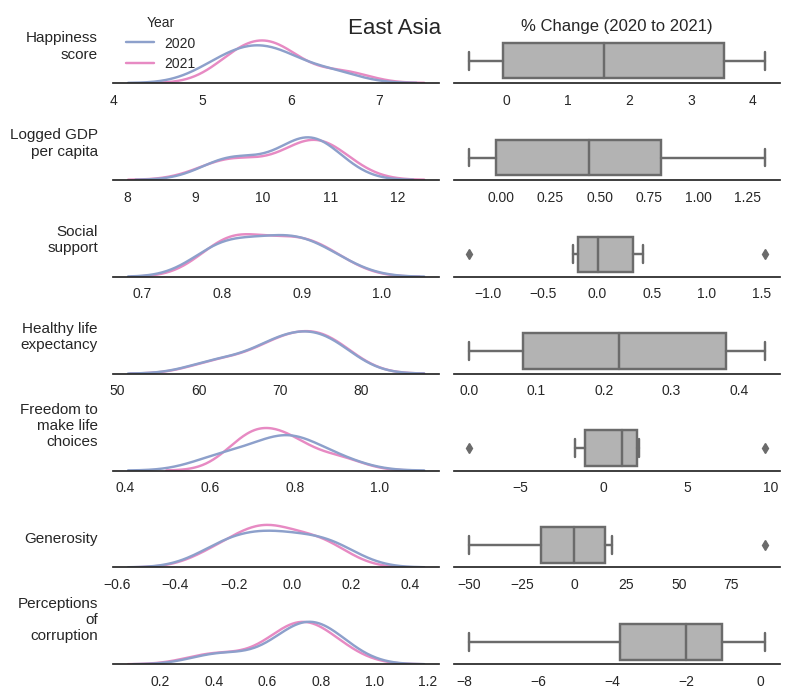

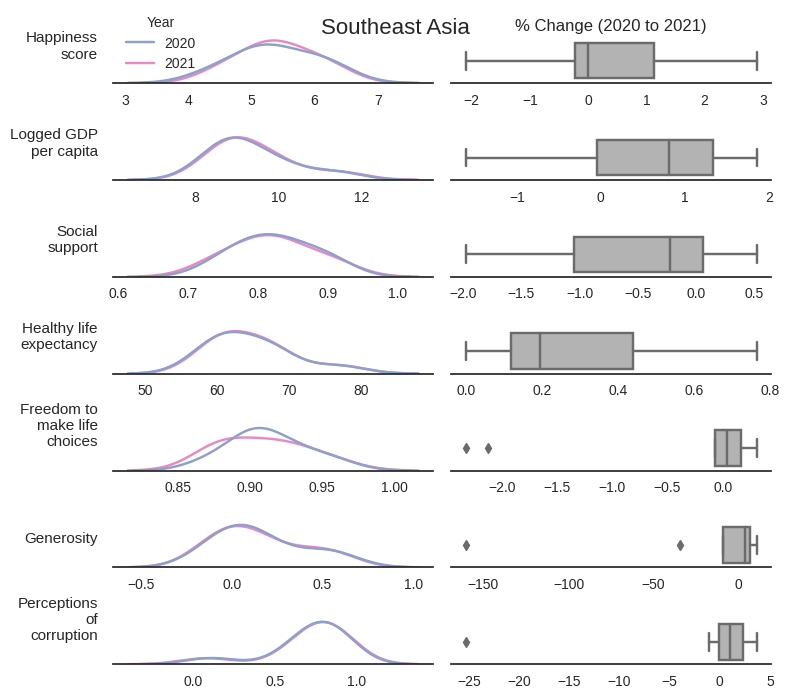

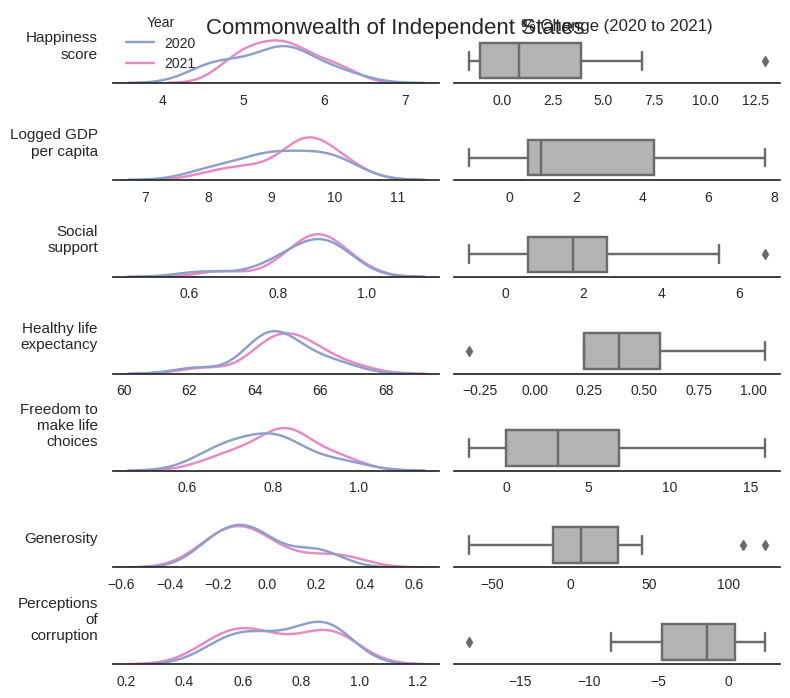

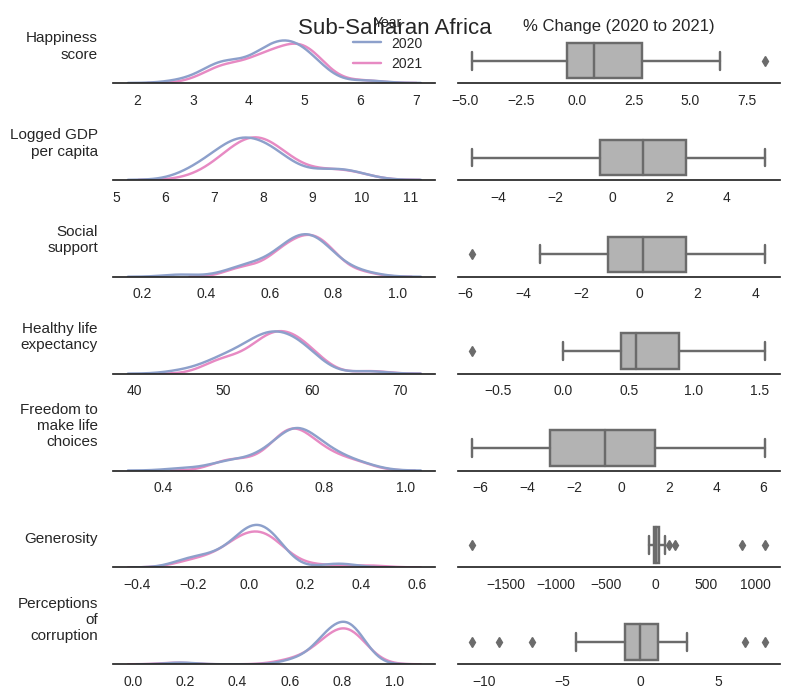

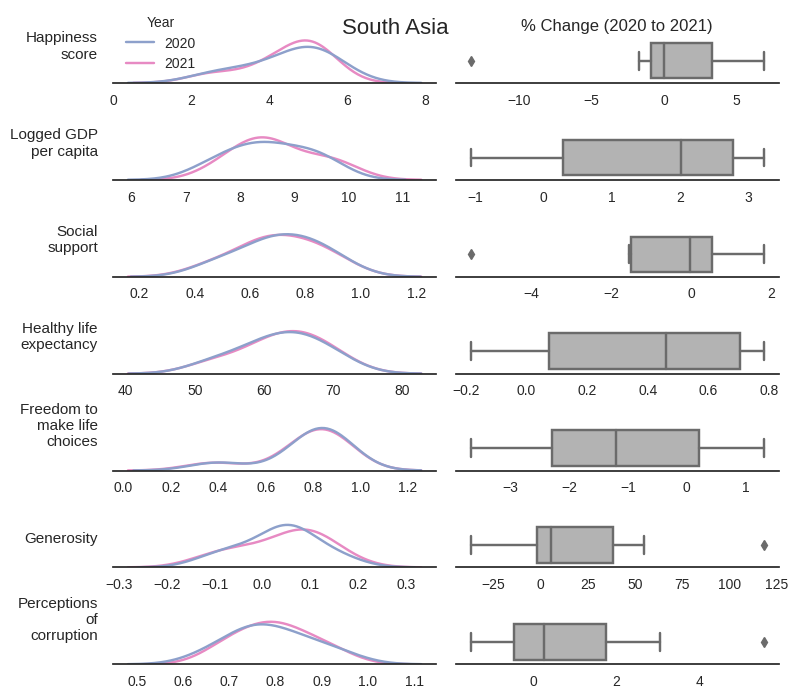

In [105]:
regions = train.Region.unique()
for i in range(1, len(regions)):
    varcompare(region=regions[i])

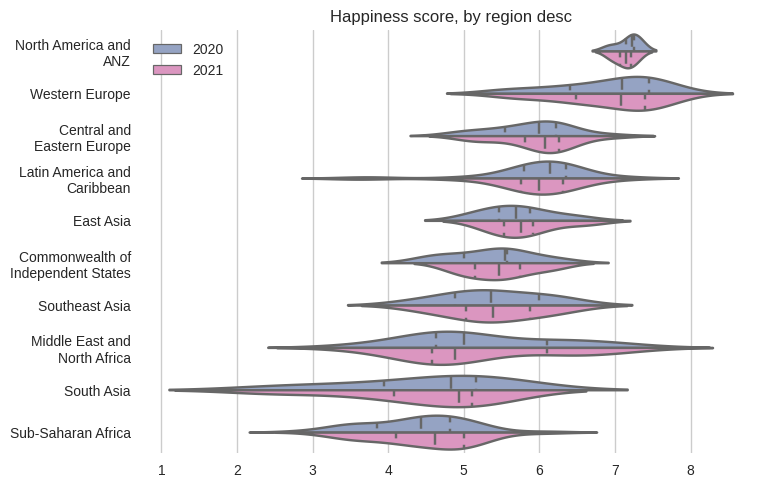

In [109]:
def regioncompare(var):
    s = train.groupby('Region')[var].median().sort_values(ascending=False)
    with sns.axes_style("whitegrid"):
        plt.figure()
        sns.violinplot(data=train, x=var, y='Region', hue='Year', 
                       order=s.index,
                       split=True, 
                       palette = sns.color_palette()[2:4],
                       inner='quartiles')
        plt.gca().set_yticklabels([textwrap.fill(t.get_text(), 18)  for t in plt.gca().get_yticklabels()])
        plt.gca().legend(loc='upper left')
        plt.gca().set_title(var + ', by region desc')
        plt.gca().set_xlabel("")
        plt.gca().set_ylabel("");
        sns.despine(bottom=True, left=True)

var=scorecols[0]
regioncompare(var)

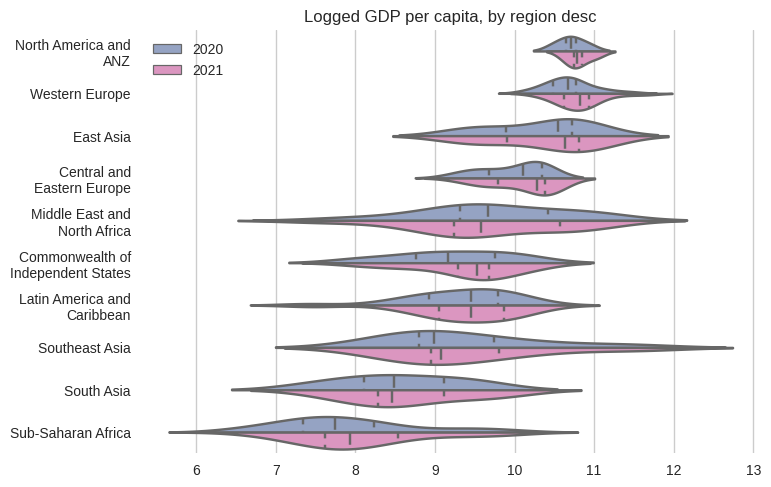

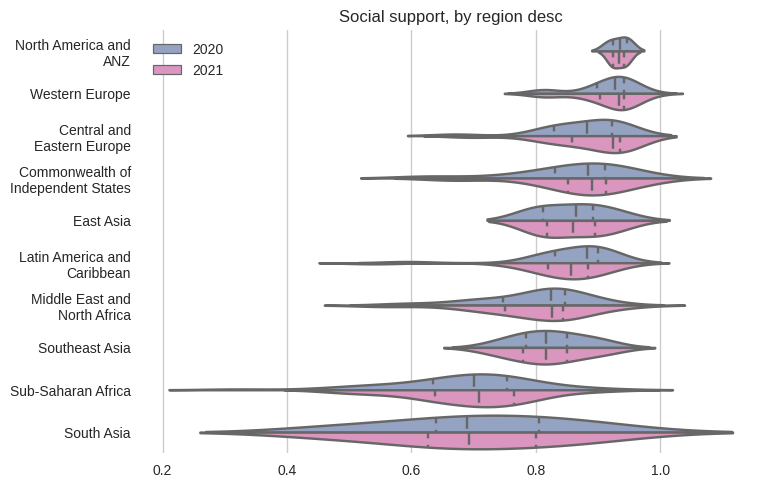

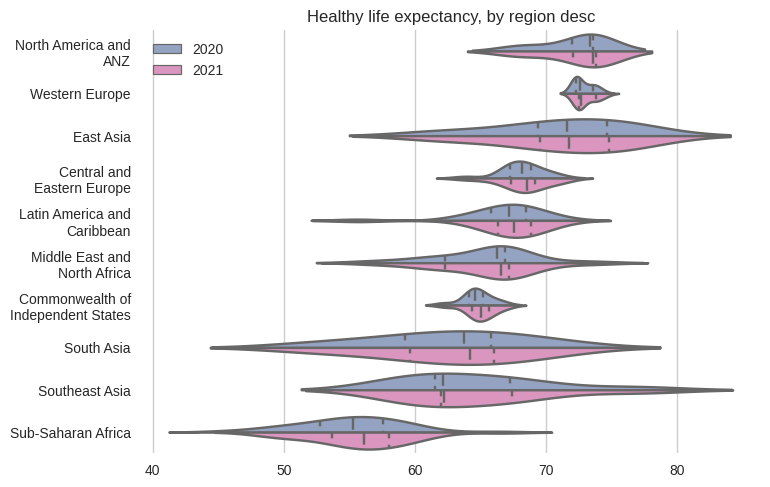

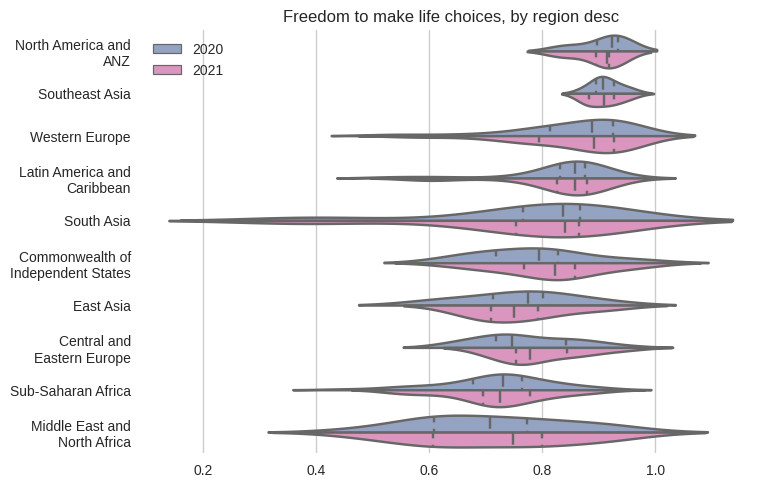

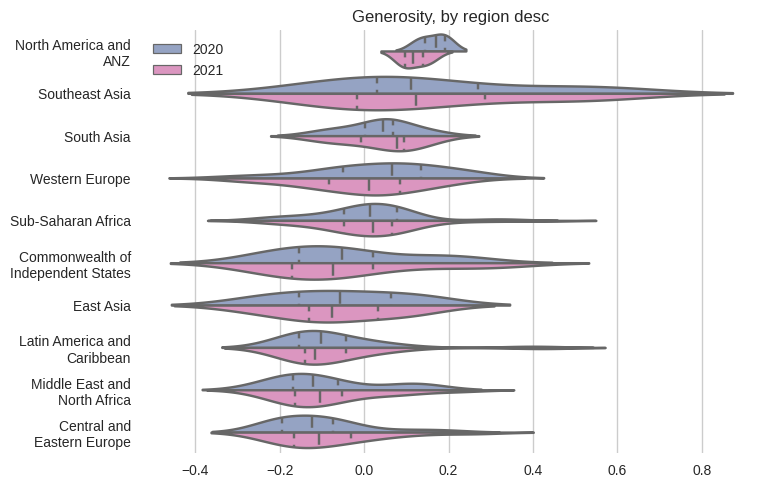

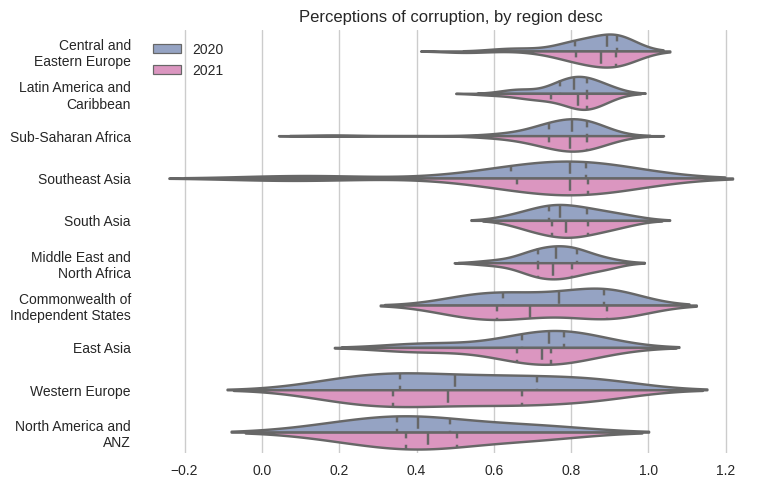

In [110]:
for i in range(1, len(scorecols)):
    regioncompare(scorecols[i])

In [111]:
def vardetail(var):
    color20 = sns.color_palette()[2]
    color21 = sns.color_palette()[3]

    fig = plt.figure(figsize=(9,9), 
#                      constrained_layout=True
                    )

    gs = fig.add_gridspec(5,3)
    ax = fig.add_subplot(gs[:1, :])
    ax1 = fig.add_subplot(gs[1:3, 1])
    ax2 = fig.add_subplot(gs[1:3, 2])
    ax3 = fig.add_subplot(gs[3:, 1])
    ax4 = fig.add_subplot(gs[3:, 2])
    ax5 = fig.add_subplot(gs[1:, :1])

#     sns.violinplot(data=train, x=var, y='all', hue='Year', split=True, 
#                    palette=[color19, color20], inner='quartiles', ax=ax)
    sns.kdeplot(data=train, x=var, hue='Year', palette=[color20, color21], ax=ax)
#     ax.set_title('All Countries')
    ax.set_xlabel("")
    ax.set_ylabel("")
#     ax.legend(loc='upper left')
#     ax.legend(bbox_to_anchor=(0, 1))
    
    # 2020 top
    order = rank(train20, var, False)
    sns.barplot(data=train20, y='Country', x=var, order=order.head(10), palette=[color20], ax=ax1)
    ax1.set_title('Top 10 Countries')
    ax1.set_xlabel("")
    ax1.set_ylabel("2020", size=12)
    ax1.set_yticklabels([textwrap.fill(t.get_text(), 15)  for t in ax1.get_yticklabels()])

    # 2020 bottom
    order = rank(train20, var)
    sns.barplot(data=train20, y='Country', x=var, order=order.head(10), palette=[color20], ax=ax2)
    ax2.set_title('Bottom 10 Countries')
    ax2.set_xlabel("")
    ax2.set_ylabel("")
    ax2.set_yticklabels([textwrap.fill(t.get_text(), 15)  for t in ax2.get_yticklabels()])

    # 2021 top
    order = rank(train21, var, False)
    sns.barplot(data=train21, y='Country', x=var, order=order.head(10), palette=[color21], ax=ax3)
    ax3.set_xlabel("")
    ax3.set_ylabel("2021", size=12)
    ax3.set_yticklabels([textwrap.fill(t.get_text(), 15)  for t in ax3.get_yticklabels()])

    # 2021 bottom
    order = rank(train21, var)
    sns.barplot(data=train21, y='Country', x=var, order=order.head(10), palette=[color21], ax=ax4)
    ax4.set_xlabel("")
    ax4.set_ylabel("")
    ax4.set_yticklabels([textwrap.fill(t.get_text(), 15)  for t in ax4.get_yticklabels()])
    
    # by Region
    s = train.groupby('Region')[var].median().sort_values(ascending=False)
    sns.violinplot(data=train, x=var, y='Region', hue='Year', order=s.index,
                   palette=[color20, color21], split=True, inner='quartiles', ax=ax5)
    ax5.set_yticklabels([textwrap.fill(t.get_text(), 14)  for t in ax5.get_yticklabels()])
    ax5.set_title('Region, desc')
    ax5.set_xlabel("")
    ax5.set_ylabel("")
    ax5.legend_.remove()
    
    plt.suptitle(var + ', 2021 vs 2020', size=18)
    plt.tight_layout()
    sns.despine(left=True, bottom=True)
#     ax5.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    fig.show()

In [112]:
def rank(train, var, asc=True):
    data = train[['Country', var]].sort_values(by=var, ascending=asc)
    return data['Country']

def varchange(var):
    color = sns.color_palette()[-1]
    colorP = sns.color_palette()[4]
    colorN = sns.color_palette()[5]
    
    fig=plt.figure(figsize=(8,6), 
#                    constrained_layout=True
                  )
    gs = fig.add_gridspec(5,2)
    ax = fig.add_subplot(gs[:1, :])
    ax1 = fig.add_subplot(gs[1:, 1])
    ax2 = fig.add_subplot(gs[1:3, 0])
    ax3 = fig.add_subplot(gs[3:, 0])

    # box
    sns.boxplot(data=traindiff, x=var, orient='h', palette=[color], ax=ax)
    ax.set_xlabel("")

    # pos/neg counts
    data = traindiffM[dfdiffM.Var == var]
    data['% Change'].value_counts().plot.pie(ax=ax1, labels = ['Positive', 'Negative'], colors=[colorP, colorN])
    # alternate: bar
    # sns.countplot(data=data, x='% Change', order=['Positive', 'Negative'], ax=ax4)
    ax1.set_title('Country Counts')
    ax1.set_xlabel("")
    ax1.set_ylabel("")

    # top 10
    order = rank(traindiff, var, False)
    sns.barplot(data=traindiff, y='Country', x=var, order=order.head(10), palette=[colorP], ax=ax2)
    ax2.set_title('Top 10 Countries')
    ax2.set_xlabel("")
    ax2.set_ylabel("")

    # bottom 10
    order = rank(traindiff, var)
    sns.barplot(data=traindiff, y='Country', x=var, order=order.head(10), palette=[colorN], ax=ax3)
    ax3.set_title('Bottom 10 Countries')
    ax3.set_xlabel("")
    ax3.set_ylabel("")

    plt.suptitle(var + 'ange (2020 to 2021)', size=16)
    plt.tight_layout()
    sns.despine(left=True, bottom=True)
    ax.spines['bottom'].set_visible(True)

    fig.show()

diffcols = traindiff.columns[2:]

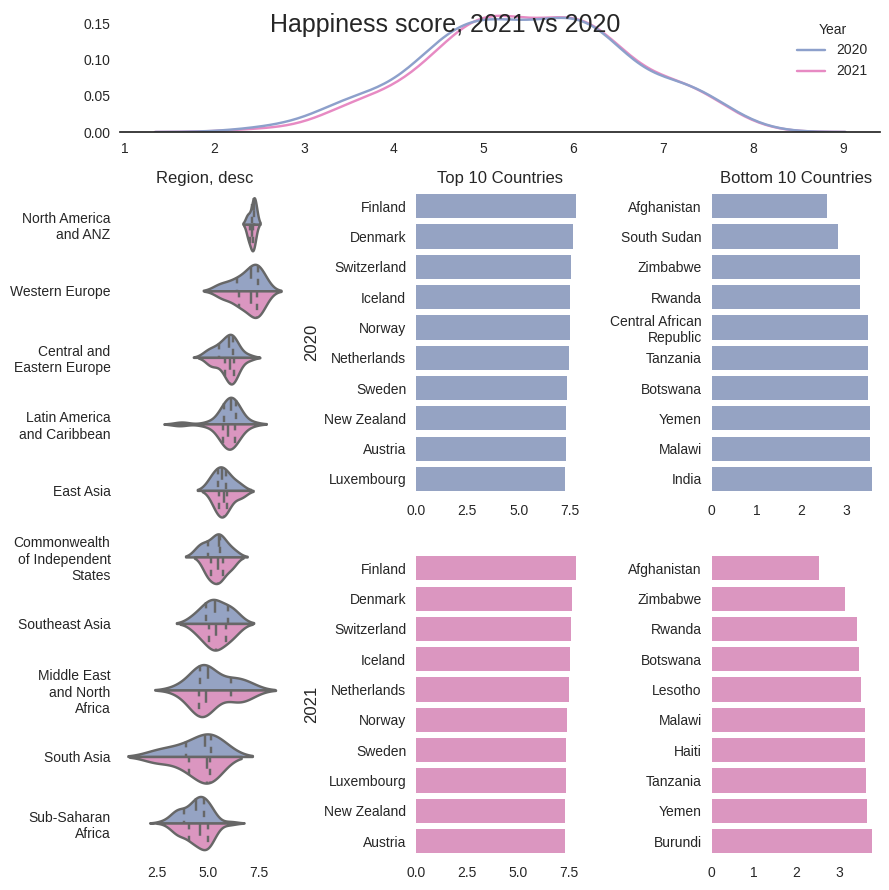

In [113]:
num = 0
vardetail(scorecols[num])

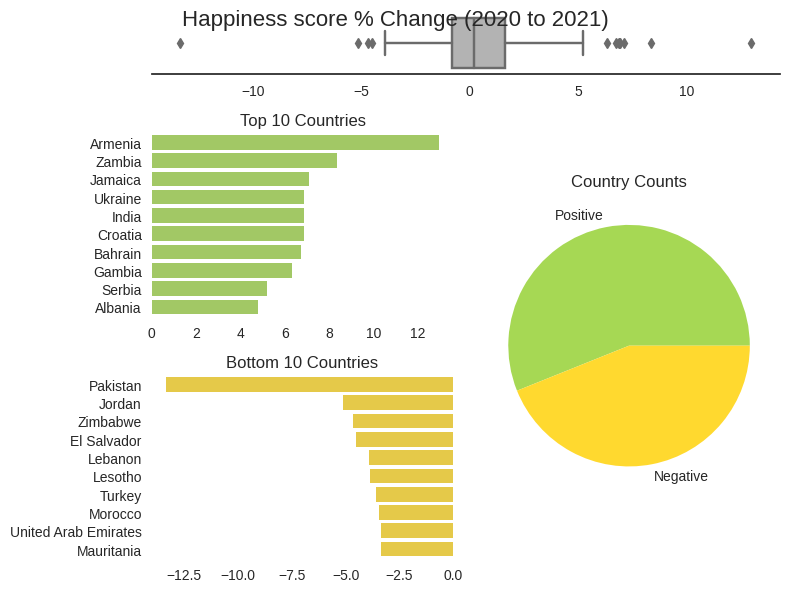

In [114]:
varchange(diffcols[num])

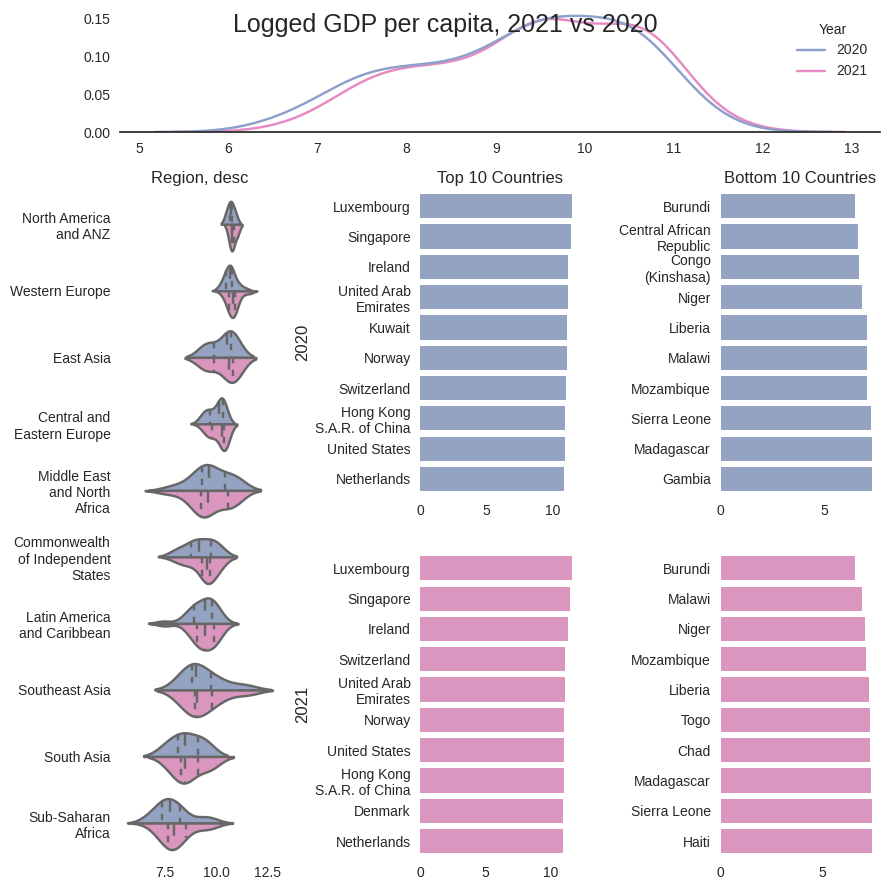

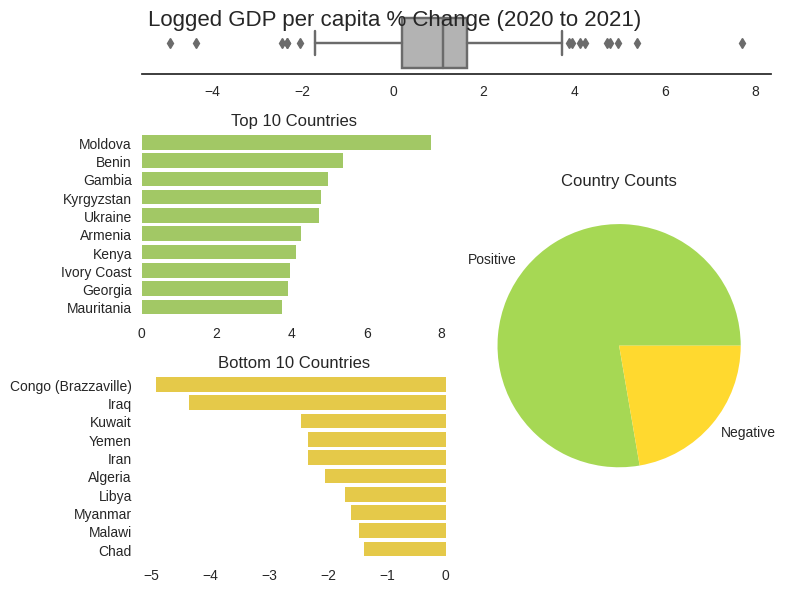

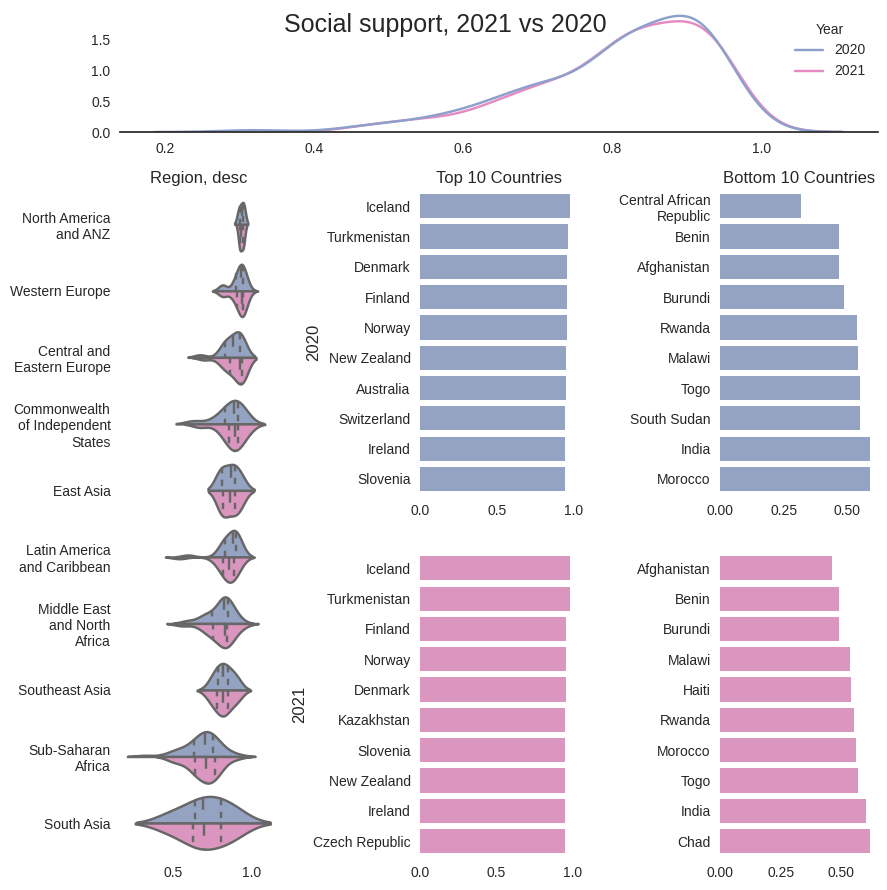

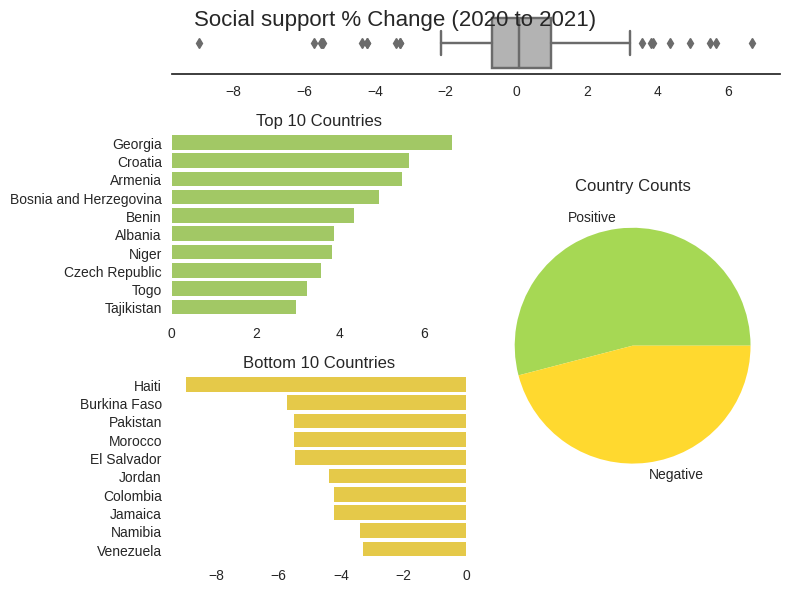

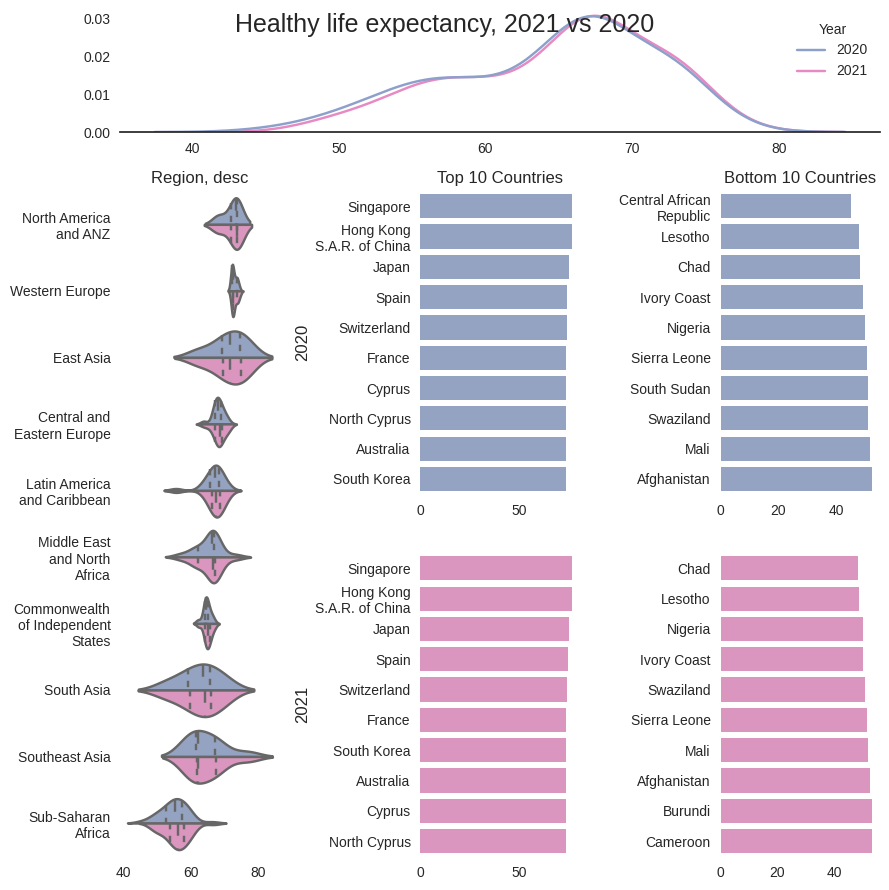

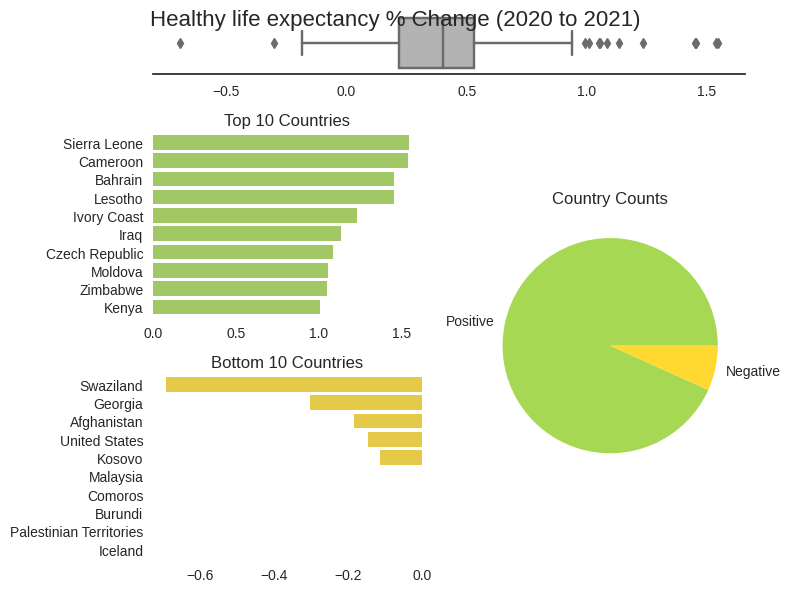

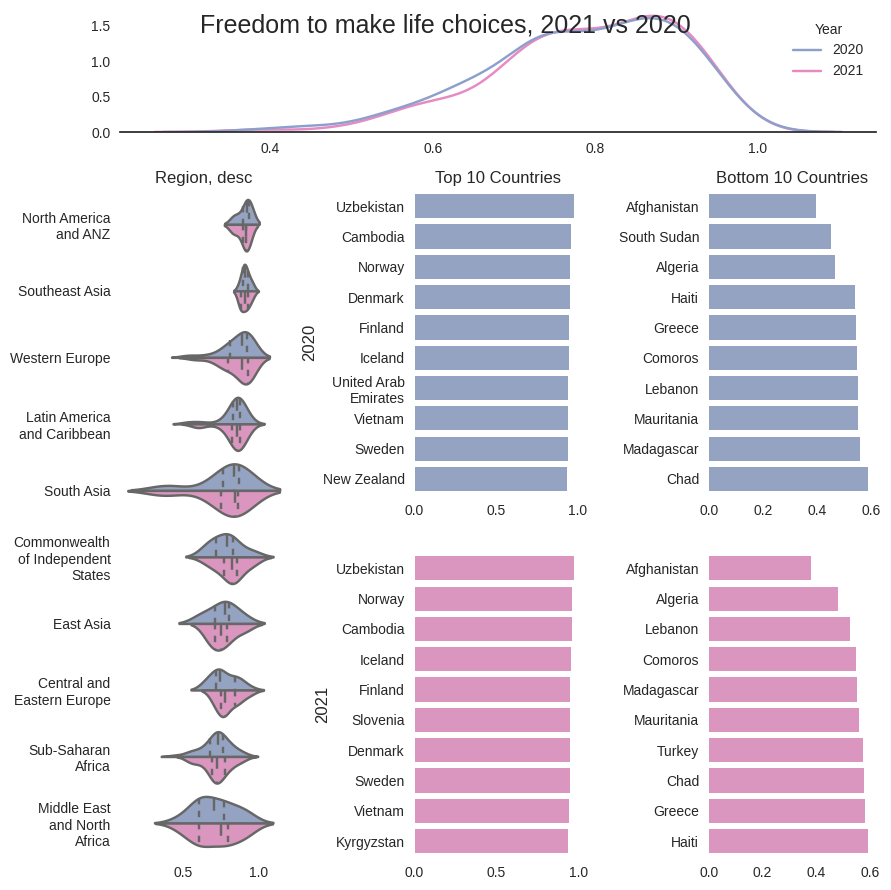

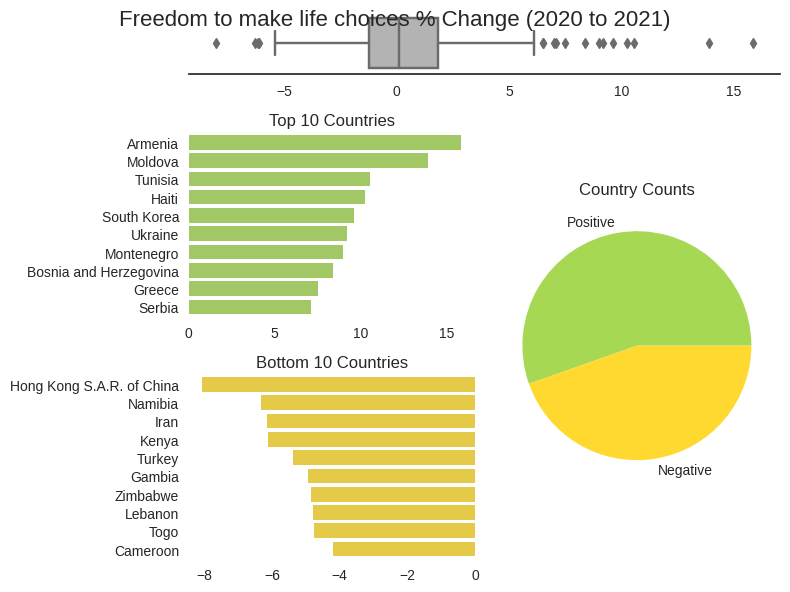

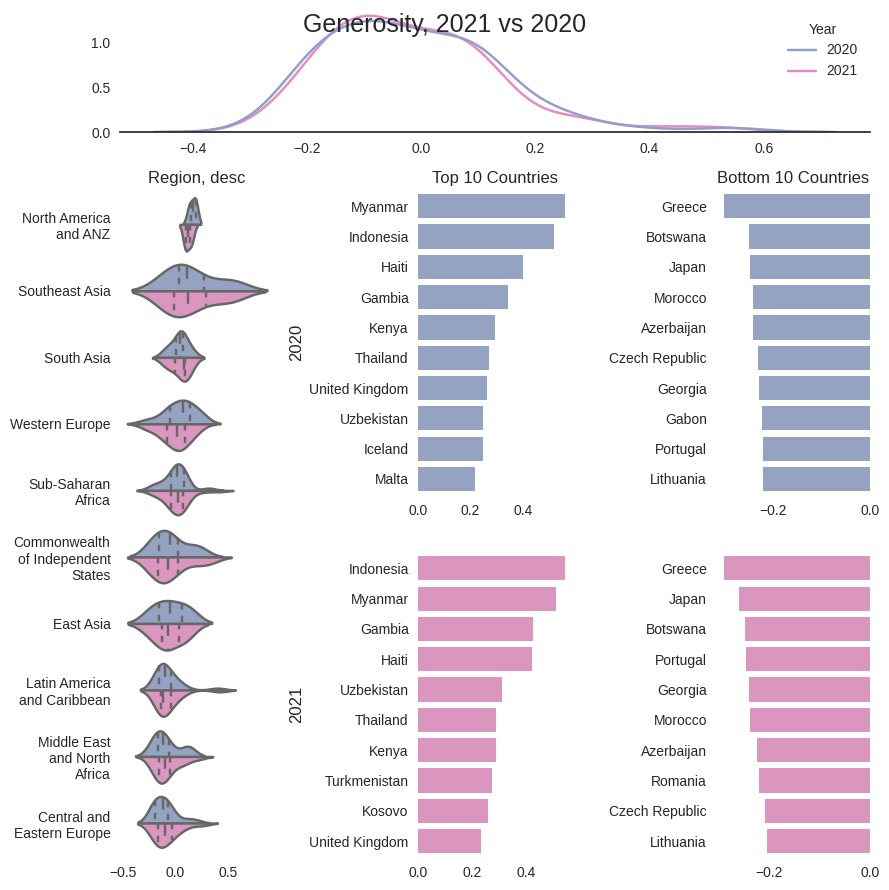

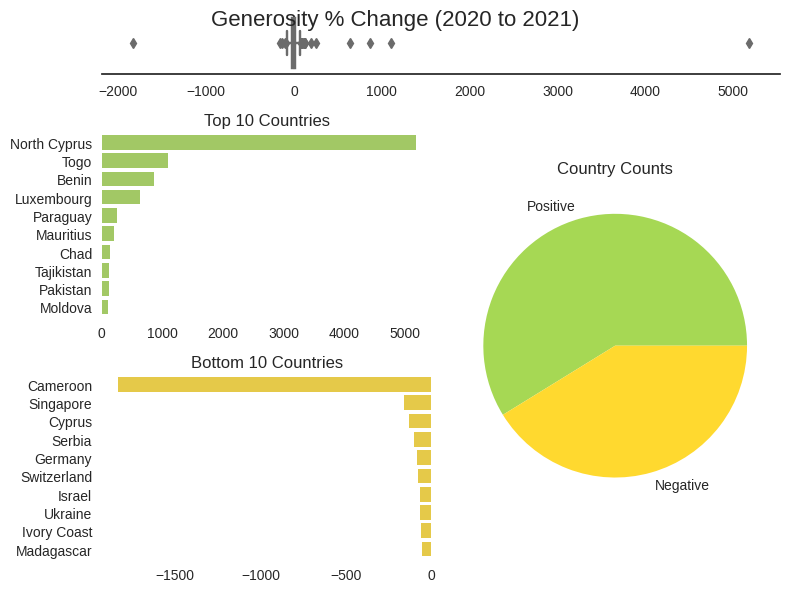

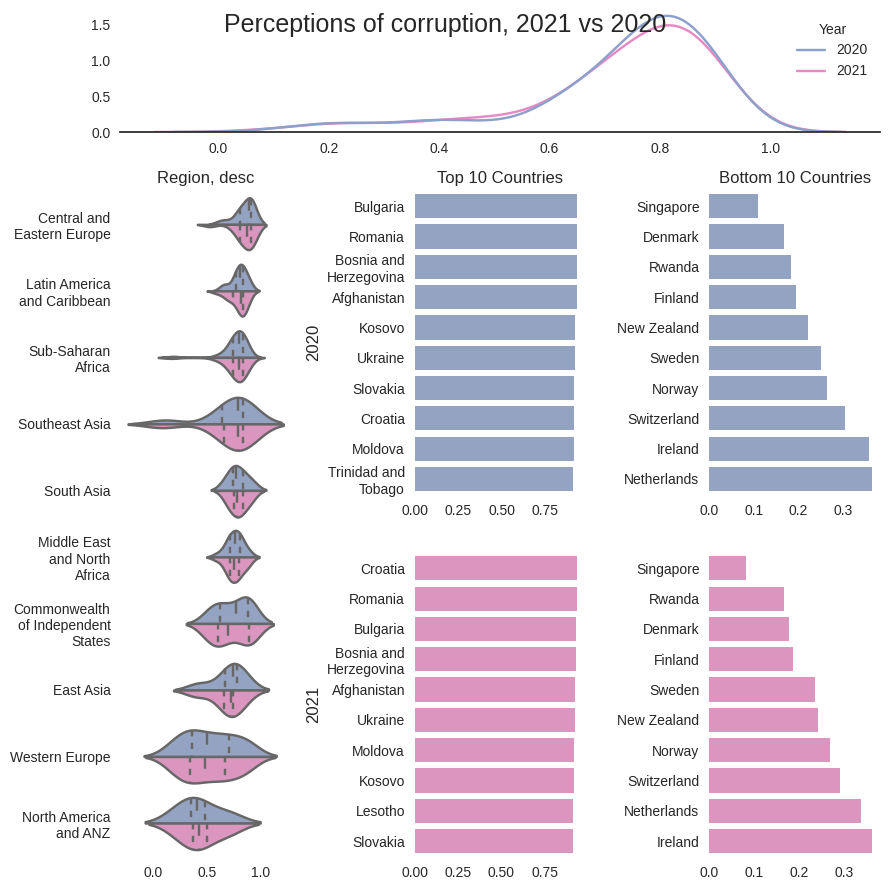

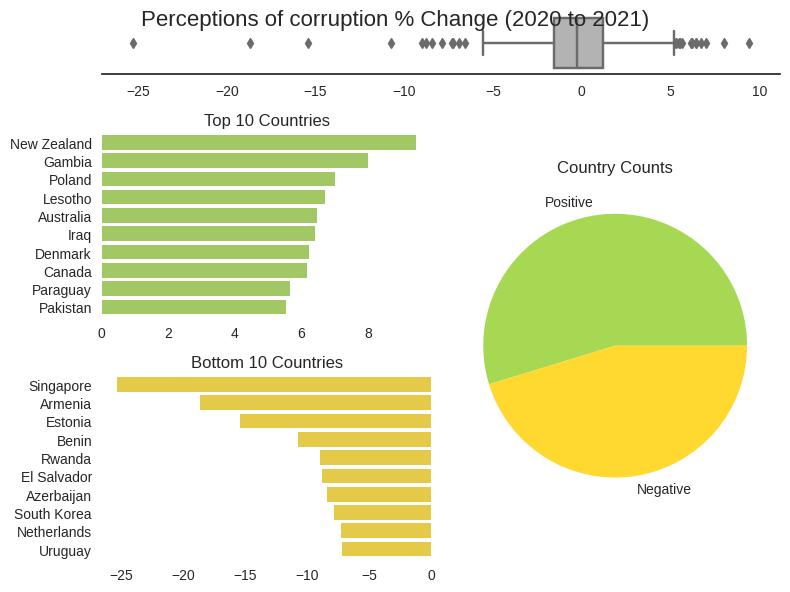

In [116]:
for i in range(1, len(scorecols)):
    vardetail(scorecols[i])
    varchange(diffcols[i])